# Final Report: Credit Default Risk Prediction 
### \-- Machine Learning for Identifying Future Defaulters

***Team 10***

***Tianying Chu(tianying) and Akshay Oza (aoza)***

*Youtube Link for our presentation : <a href=https://youtu.be/5KxgxROle80> Team10- Credit Default Risk Prediction Using Machine Learning | DSBD Fall -2020 </a>*

## Motivation & Related Works
As the power of consumption increases, **people tend to spend more now and borrow against future income**. Relative to the bank loans, personal loans have shorter approval procedure and lower application standards. Since the first P2P (peer-to-peer) web lending platform, ZOPA, was established in 2005, the personal loan industry has grown rapidly throughout the world. Outstanding personal loan debt triples from 49 billion dollars in 2010 to 156 billion dollars, as of Q3 2019.

Nevertheless, **the prosperity of the personal loan market brings a serious credit default problem**. Delinquency rates (60 days or more past due) for personal loans is currently 3.3%, which is higher than mortgages (1.5% delinquency rate), auto loans (1.4%), and credit cards (1.8%). The main reason lies in lending platforms that relax the loan audit conditions and ignore the potential risks, in order to enhance their market competitiveness and get more benefits. Usually, personal loans are unsecured. **Once the clients default, the loans will become bad debts for the lending platform and could never be taken back, which may cause great economic losses for the investors and the lending platform.** Therefore, how to better control the economic risk caused by the customer loan default is the key to the stable development of the loan platform and the credit industry. That's also the motivation of our project.

There are also many related works regarding default risk predicting and various models are used. This paper [[1]](https://doi.org/10.1155/2020/5608392) established a CNN model to predict default loan and compare with three traditional models including SVM model, Bayes model, and RF model based on extraction-feature sample and full-feature sample. The paper [[2]](https://ieeexplore.ieee.org/abstract/document/8701943?casa_token=x5QXZ7vSYpUAAAAA:9U1sRMOPo1krRSxHFBK8i9mwVHIhz-7qdmMEpeiuIwc5o3hemmefTyrQ4XjlOpnQgrssqZLwNw) extracts firstly the features of the credit dataset using RBMs (restricted Boltzmann machines) and then establishes a LDA (linear discriminant analysis) prediction model. 

## Problem Domain

For our project, we limit the domain within **an international non-bank financial institution called Home Credit**, a company founded in 1997 and has provided more than 131 million loans for people worldwide. Our goal is to **predict how capable each applicant is of repaying a loan** based on clients' current loan applications to Home Credit and their previous lending activities(eg. credit card balance, POS (point of sales) and cash loans, installments payments). We develop a series of credit scoring models which **classify personal loan applications into default and nondefault groups**, and also **pick out the most important factors related to credit default** from hundreds of columns in the datasets.

### Definition of Task, Performance, Experience & **Value**

The **Task** for our project is to *predict whether a client has payment difficulties*(1 for having difficulties and 0 otherwise). If he/she had late payment on at least one of the installments of the loan in our sample, we will regard he/she as having payment difficulties and thus the lending company should not issue a loan to that applicant.

To evaluate the **Performance**, we will *use recall to avoid an applicant who actually defaults being predicted as not default* by our models. It is important because the landing platform will have a benefit lost when lending money to those applicant. Also, we plot *Precision-Recall Curve* for different thresholds.

Our model will learn from the **Experience** of loan applicants' information at application time, their previous loans and payments in Home Credit, credit card loans in Home Credit and other lending activities reported to Credit Bureau.

The **Value** we would be adding through our project is *increased efficiency and accuracy* through which financial institutions can evaluate a loan application and examine the risk of whether a loan applicant is likely to default or not. This will *save financial institutions a significant amount of money* that they might lose otherwise while lending a loan to someone who might face difficulties in repayment

## Data

The data we will be using for our project is the <a href= https://www.kaggle.com/c/home-credit-default-risk/overview> Home Credit Default Risk Data</a>. It was provided by the Home Credit Group as a part of the Kaggle Competition. The entire data folder has **10 files**. The following is the data schema: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir("drive/MyDrive/885 DSBD/Project2/Team 10 - Credit Default Risk Prediction")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


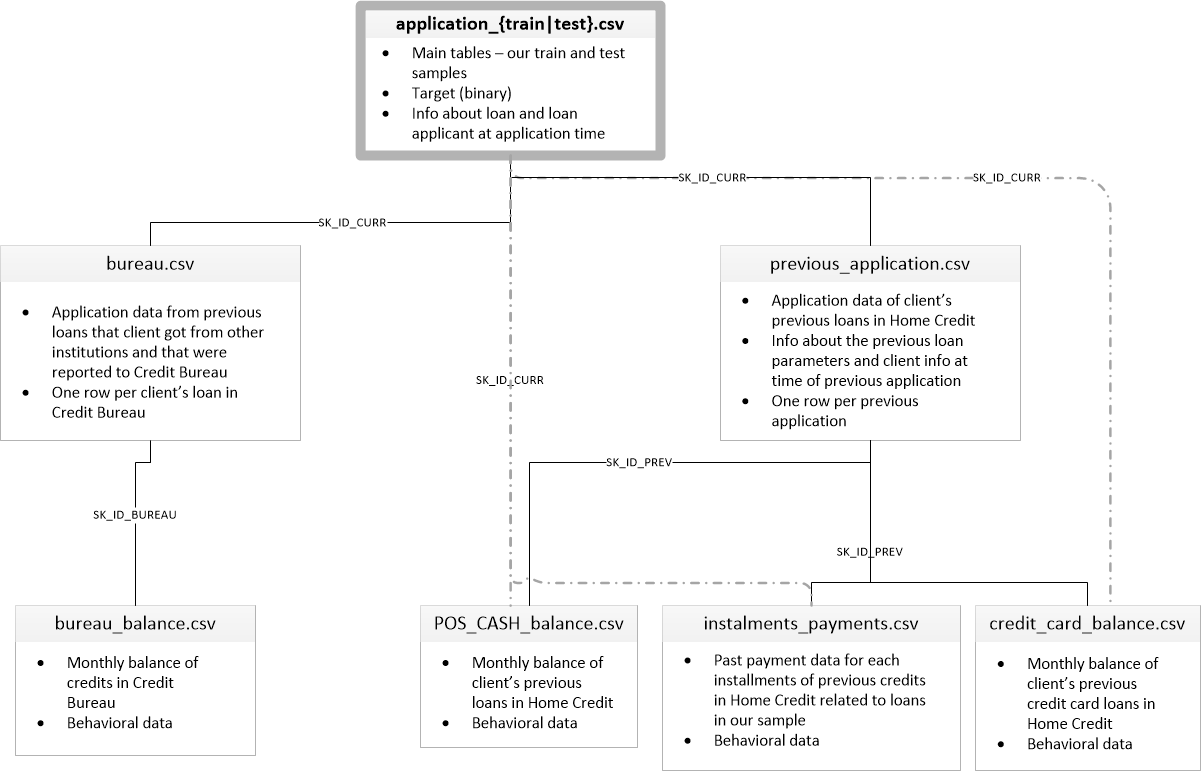

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
from IPython.display import display
import os
img= Image.open(r"./Images/Data_Schema.png")
display(img)

For all the **221 columns** we have in the whole datasets, `application_{train|test}.csv` has 122 columns. Each row represents a loan application corresponding to a customer, which is also our prediction unit. So we will mainly focus on these two files, and we would be using grouping and aggregating techniques for the other files like `previous_application`, `installment_payment`,etc..

## Exploratory Data Analysis


The Exploratory Data Analysis part will **focus on the `application_train.csv`**. We have **307512 rows and 122 columns** in this file. The `TARGET` column is a binary outcome we will predict. 1 represents that the loan applicant had difficulty in repaying or did default their payment and 0 otherwise. As we can see from the table below, there are 282,686 `0`s and 24,825 `1`s. It's **a highly unbalanced dataset**.

In [ ]:
import pandas as pd
application = pd.read_csv('./Data/application_train.csv')
application.head(10)

SK_ID_CURR  TARGET  ... AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1  ...                       0.0                        1.0
1      100003       0  ...                       0.0                        0.0
2      100004       0  ...                       0.0                        0.0
3      100006       0  ...                       NaN                        NaN
4      100007       0  ...                       0.0                        0.0
5      100008       0  ...                       1.0                        1.0
6      100009       0  ...                       1.0                        2.0
7      100010       0  ...                       0.0                        0.0
8      100011       0  ...                       0.0                        1.0
9      100012       0  ...                       NaN                        NaN

[10 rows x 122 columns]

In [ ]:
(application.groupby(['TARGET'])['SK_ID_CURR'].count()
                             .reset_index().rename(columns={'SK_ID_CURR': 'COUNT'}))

TARGET   COUNT
0       0  282686
1       1   24825

In the following paragraphs, we will explore how the data is distributed. **The original codes are stored in `Intermediate_Progress_EDA.ipynb`**. We find some important columns in terms of the client's **personal background** and **information about current loan**.

### Personal Background

For a client's personal background, there are three types of variables: **binary variables** like *Gender*, *Contract Type*, **categorical variables** like *Income Type*, *Family Status*, and **numeric variables** like *Number of Family Numbers*.

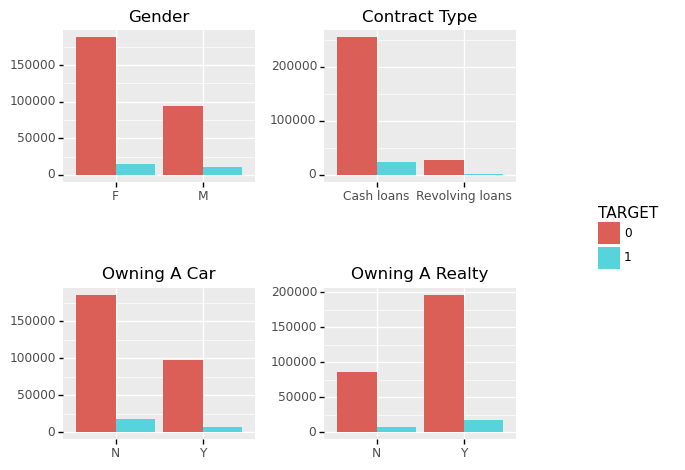

In [ ]:
background_1 = Image.open(r"./Images/Personal_Background_1.png")
display(background_1)

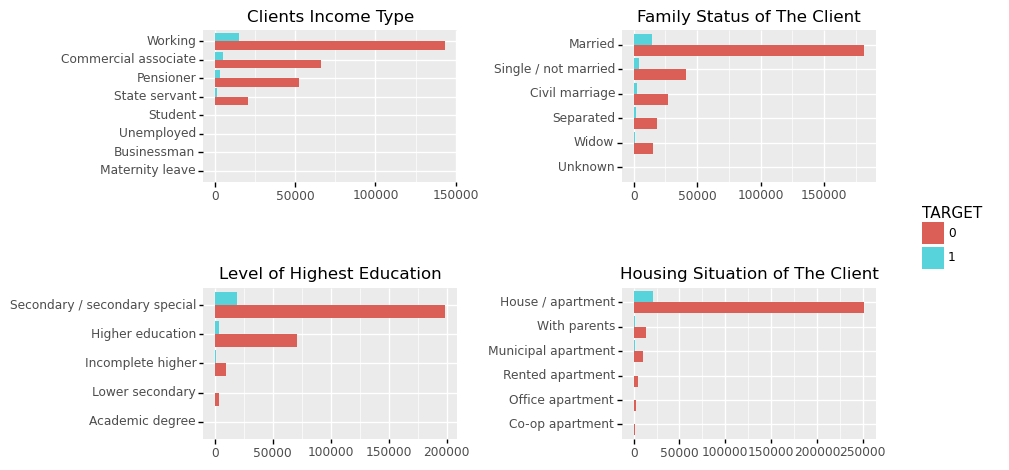

In [ ]:
background_2 = Image.open(r"./Images/Personal_Background_2.png")
display(background_2)

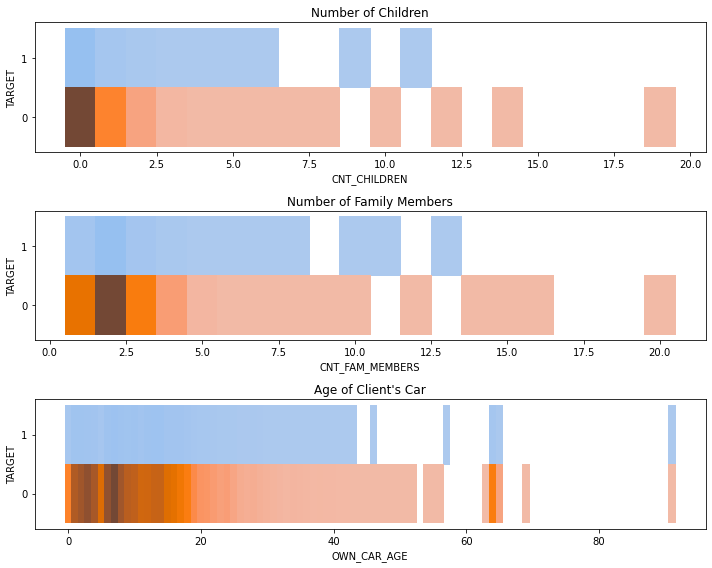

In [ ]:
background_3 = Image.open(r"./Images/Personal_Background_3.png")
display(background_3)

From all the plots above, we can quickly get the **characteristics of the clients** in our datasets.

- Most clients are **female**. They tend to sign a **cash loan** contract. 1/3 of them **own a car**, but 2/3 of them **own a realty**.

- **Working people**, **commercial associate**, **pensioner** and **state servant** are the most 4 common income type. Most of them are **married** and live in a **house** or an **apartment**. The level of highest education is either **secondary special** or **higher education**.

- Most clients have **1 family member** and **no child**. The age of their cars is usually less than 20 years.

### Loan Information

For loan information, we will explore the **monetary amount related to loan** like *Annuity*, *Price of The Goods*, **defaults of client's social surroundings** for different days past due, and **enquiries made before current loan application** within different time periods.

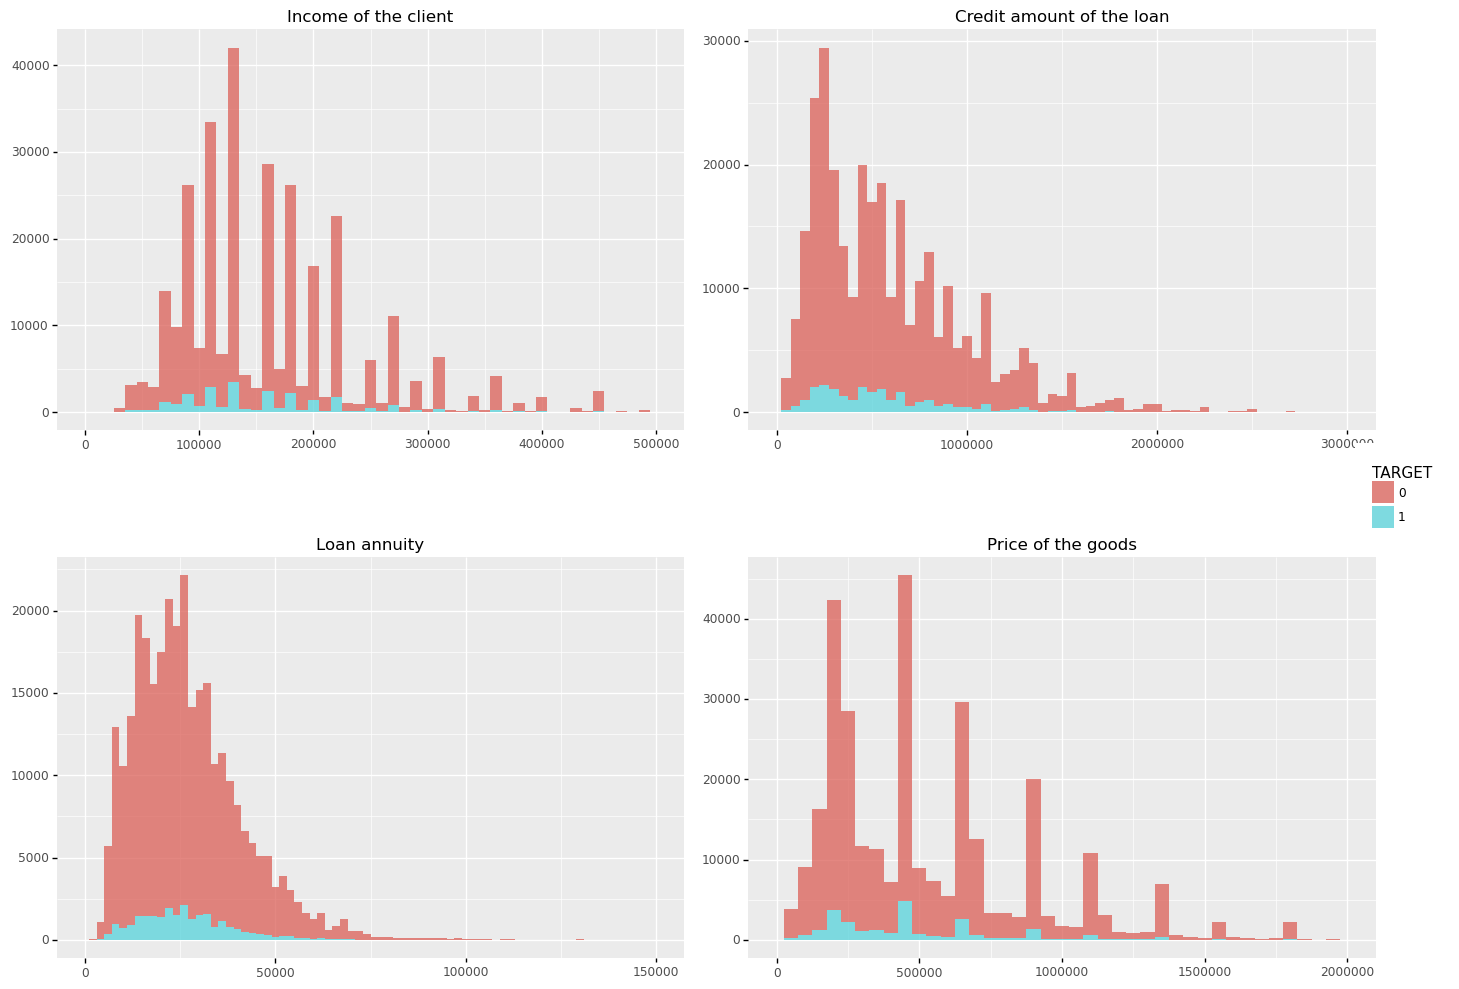

In [ ]:
loan_1 = Image.open(r"./Images/Loan_Information_1.png")
display(loan_1)

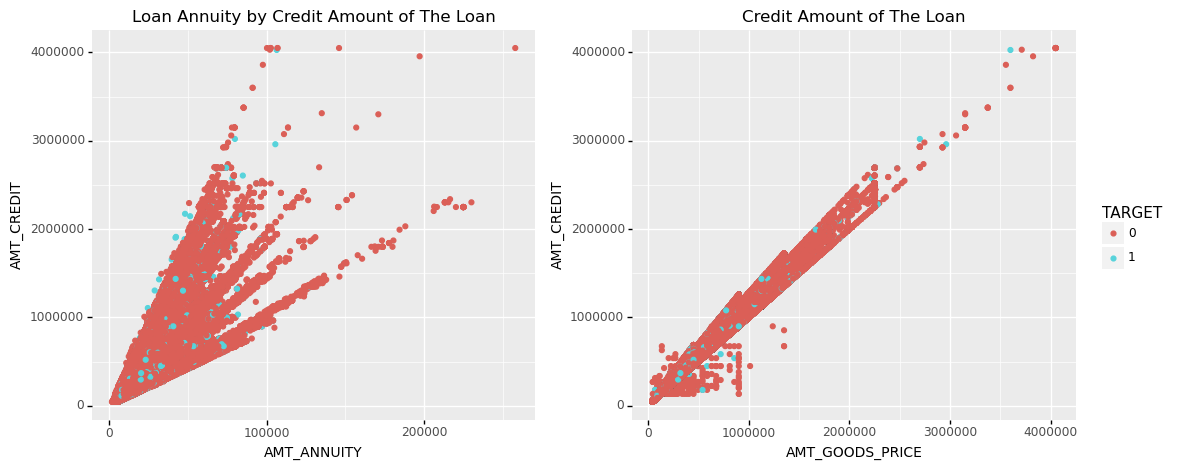

In [ ]:
loan_2 = Image.open(r"./Images/Loan_Information_2.png")
display(loan_2)

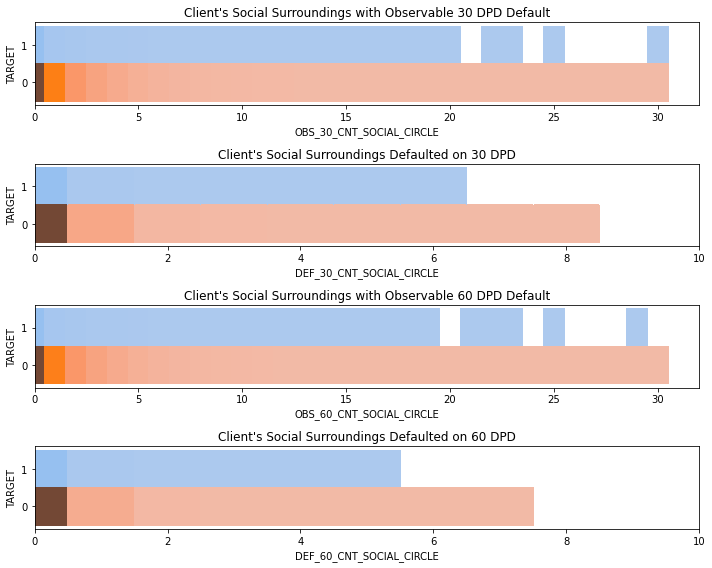

In [ ]:
loan_3 = Image.open(r"./Images/Loan_Information_3.png")
display(loan_3)

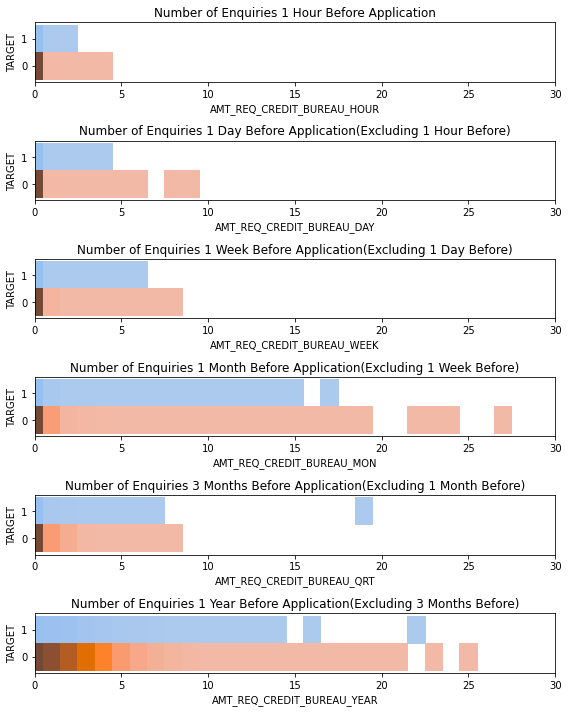

In [ ]:
loan_4 = Image.open(r"./Images/Loan_Information_4.png")
display(loan_4)

For current loan applications, we can summary from the above plots that:

- The **income** of client is mostly **between 50,000 and 300,000**. The **credit amount** of the loan is within the range of **200,000 and 1000,000**. The **price of the goods** for which the loan is given is **in the same order of magnitude as the credit amount**. And the **loan annuity** is usually **between 0 and 50,000**.

- Both **loan annuity** and **price of the goods** are **positively correlated with the credit amount**. In addition, it seems that there are several rates between loan annuity and credit amount.

- The client's social surroundings rarely default, with **observable 30/60 DPD (days past due) default less than 30** and actual **default less than 10**. The **modes are all 0**.

- **Most clients don't make an enquiry** to Credit Bureau before their application. Usually **within 1 week** before application, the number of enquiries is **less than 10**. And the total number of enquiries **within a year doesn't exceed 30**.

### Missing Values

Besides clients' personal background and loan information, we also check the missing values in the `application_train.csv` file. We consider different ways to impute columns with missing values depending on the proportion of missing and the interpretability of columns.

In [ ]:
def miss_prop(df):
    '''
    Calculate percentage of missing values
    '''
    return df.isnull().sum(axis=0) / df.shape[0]

# Calculate percentage of missing values for different TARGET values
missing = application.groupby(['TARGET']).apply(miss_prop).T
(missing[missing.any(axis=1)].style
                             .format('{:.2%}')
                             .bar(color='#FFD5C2', vmin=0, subset=[0], align='zero')
                             .bar(color='#CDDFDF', vmin=0, subset=[1], align='zero'))

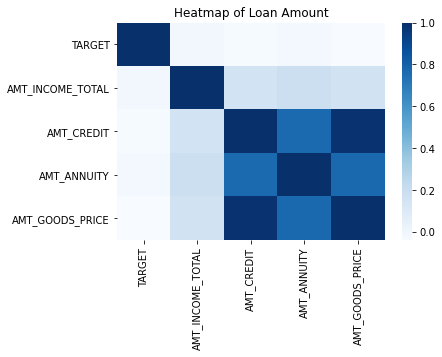

In [ ]:
missing_1 = Image.open(r"./Images/Missing_Values_1.png")
display(missing_1)

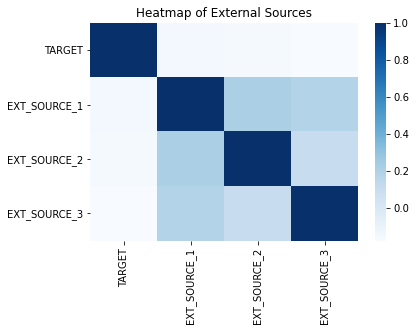

In [ ]:
missing_2 = Image.open(r"./Images/Missing_Values_2.png")
display(missing_2)

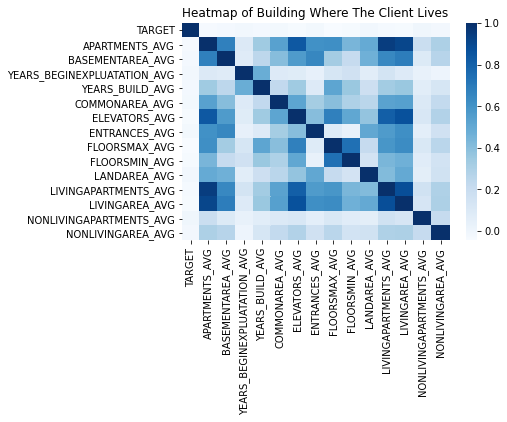

In [ ]:
missing_3 = Image.open(r"./Images/Missing_Values_3.png")
display(missing_3)

From the tables and visualizations above, we can find that there are 67 columns in the `application_train.csv` have missing values. There is **no significant difference between different `TARGET` values**. For different series of columns, we can impute them differently.

- **`AMT_ANNUITY`**, **`AMT_GOODS_PRICE`** and **`CNT_FAM_MEMBERS`** have only a few missing values. So we will simply fill them by **mean**.

- The **categorical columns with missing values** have a high proportion of missing, like `OCCUPATION_TYPE`. We will **drop** those columns.

- For **columns ending with `_AVG`, `_MODE`, and `MEDI`**, they are normalized information about building where the client lives. Since 50 ~ 60 percent is missing and they have little correlations with `TARGET`, we'll also **drop** them.

- For **`EXT_SOURCE` columns**, they are also normalized and there is no explaination about what the external sources are. So we'll **drop** them as well.

- For **`SOCIAL_CIRCLE` columns**, less than 1% data is missing and client's social surroundings rarely default. We'll impute them by **mode**.

- For **`AMT_REQ_CREDIT_BUREAU` columns**, even though there is only 13 percent missing, we'll **drop** them because we have more extensive data about Credit Bureau in the rest files.

## Data Preprocessing

For data preprocessing, we have consider the following steps:

- **Imputation** for missing values.

- **Grouping and aggregating previous loan activities** corresponding to one current application.

- **Merge the data** from different files.

- **Downsampling** to get a balanced dataset.

- **Column transformation** before fitting models.

The original codes for **imputation, grouping and merging** are stored in **`Intermediate_Progress_Data_Processing.ipynb`**. For **Downsampling and column transformation**, the codes are stored in **`Downsampling_CT.ipynb`**.

### Imputation

From our data source we have a total of 10 files. Out of them, **the following files contain the data that may be used** for our machine learning model: 
1. `application_train.csv`- This file contains all the information regarding the current application. From our exploratory data analysis we found out the columns which had **more than 10-20% `Nan` values**. In the following section we will **remove these columns** and for the columns which have **less than 10% missing data**, we will be using imputation techniques like **mean** and **mode**.
2. `previous_application.csv`- This file contains all the information about the previous applications that the loan applicants in our `application_train.csv` applied. One current applicant (application ID) can have more than 1 previous application. Similar to `application_train.csv` we will find the columns with `Nan` values and depending on the percentage of null values present we will either **remove the columns or impute them with appropriate imputation technique**.
3. `installment_payments.csv`- This file contains all the information about the installments paid or defaulted by the current applicants. One current applicant (application ID) can have more than 1 record for installment payments. Similar to `application_train.csv` we will find the columns with `Nan` values and depending on the percentage of null values present we will either **remove the columns or impute them with appropriate imputation technique**.
4. `credit_card_balance.csv`- This file contains data regarding credit card usage of the current applicants. We explore this data and eventually made a decision to **not use this data** since credit card data is present only for 30% of our current applicants.
5. `bureau.csv`- This file contains credit history data. The file has the credit history data for every past application record that Credit Beareau has and thus for one current applicant there can be more than 1 record in this file. Similar to `application_train.csv` we will find the columns with `Nan` values and depending on the percentage of null values present we will either **remove the columns or impute them with appropriate imputation technique**.


### Grouping and Aggregation

Once we have cleaned the files above, we would be using appropriate **grouping strategies** to make sure that our final data (dataframe) has **one row corresponding to one current application/applicant** but still has corresponding data coming from other files : `previous_application.csv`, `installment_payments.csv` and `bureau.csv`.

This dataframe will then be ready for train-test split and model training. 

**`previous_applications.csv`** needs to be grouped by `PREV_SK_ID_CURR` since this is a unique identifier in our applications data. Follwing are the aggregation technique we will be using:

1. **Numerical Columns** that essentially consist continuous data like amount for example will be aggregated by **mean**.
2. **Categorical Columns** will be **first one-hot-encoded** and then aggregated by **sum**. One hot encoding also is a fine feature engineering strategy that will make our machine learning models efficient as well. 
3. `PREV_SK_ID_PREV` will be used to count the number of previous applications corresponding to every unique current applicant

**The same logic is used for `installment_payments.csv` and `bureau.csv` as well.** The merged data is stored in **`final_applications_data.csv`**.


### Downsampling

After we merge all features needed from separated files, we find **the dataset is highly imbalanced**. Therefore we consider to either upsample or downsample the dataset. Our first thought is to upsample the dataset. But since there are more than 200,000 rows in the origin dataset, we **do not have enough computational memory** to train models even with GPU in Google Colab. Therefore, **we finally choose downsample the dataset**.

We **split the training data and test data before downsampling** because we don't want the test dataset be influenced by the downsampling. After downsampling, we get 17,524 `0`s and 17,524 `1`s. This dataset is still large enough for training Machine Learning models.

### Column Transformation

Before fitting models, we still think about how to furtherr process categorical columns and numeric columns. For **categorical columns**, we use **One Hot Encoding** transformation. For numeric columns, we've tried to standardize them. But there are many binary variables in our data. And they are also taken as numeric values. So we **keep the numeric columns unchanged**.

We fit `OneHotEncoder` on the categorical columns of training data and transform the categorical columns of both training data and test data. We then concatenate the categorical features and numeric features together. After column transform, we now have **307 columns** and the training data and test data are saved to `X_fea.csv`, `X_test_fea.csv`, `y_train.csv`, and `y_test.csv`.

## Method of Analysis

### Model Training and Hyperparameter Tuning

In this section we use our downsampled data to train our models. The models we train our `Naive Bayes`, `Logistic Regression`, `Simple Layer Perceptron`, `Decision Tree`, `Random Forest` and `Gradient Boosting`. 

Once we train our model with default settings, we use **RandomizedSearchCV and 5-fold Cross Validation for our hyperparameter tuning**. Once the best model is found by our randomized search, we **store the model as `.pkl` file** so that we can avoid training the models again which takes significant amount of time. 


Follwing is the code for model training, hyperparameter tuning and saving the models.

#### Load Data

In [ ]:
# Connect to folders in google drive
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir("drive/MyDrive/885 DSBD/Project2/Team 10 - Credit Default Risk Prediction")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import pickle

In [ ]:
X_down_train_ct = pd.read_csv('./Data/X_fea.csv', index_col=0)
X_test_ct = pd.read_csv('./Data/X_test_fea.csv', index_col=0)
y_down_train = np.genfromtxt('./Data/y_train.csv')
y_test = np.genfromtxt('./Data/y_test.csv')

In [ ]:
X_down_train_ct.head()

onehotencoder__x0_Cash loans  ...  BUCREDIT_CURRENCY_currency 3
0                           1.0  ...                           0.0
1                           1.0  ...                           0.0
2                           1.0  ...                           0.0
3                           1.0  ...                           0.0
4                           1.0  ...                           0.0

[5 rows x 307 columns]

In [ ]:
y_down_train

array([0., 0., 0., ..., 1., 1., 1.])

#### Hyperparameter Tuning

Here are hyperparameters we consider to tune.

- `Naive Bayes` and `Logistic Regression` do not have hyperparameters to tune.

- For `Simple Layer Perceptron`, we consider different regularization terms. The best perceptron model uses `penalty='l1'` and `alpha=0.01`.

- For `Decision Tree`, we consider 4 by 4 combinations of the max depth of trees and max features to use. The best decision tree model uses `max_features=18`and `max_depth=5`, which is the square root of the number of all features and a quarter of square root.

- For `Random Forest`, we limited max depth and max features to a smaller range based on the selection of decision tree. Also, we consider the number of trees to estimate. The best random forest uses `max_depth=18`, `max_features=18` and `n_estimators=200`.

- For `Gradient Boosting`, we consider learning rate and regularization weights besides max depth, max features and the number of trees. The best gradient boosting model uses `learning_rate=0.1` and `reg_lambda=0.1`.


#### Naive Bayes - Downsampling

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import confusion_matrix

In [ ]:
gnb = GaussianNB()

In [ ]:
# 5-fold cross validation score for Gaussian Naive Bayes
gnb_score = cross_val_score(gnb, X_down_train_ct, y_down_train, cv=5, scoring='recall').mean()
gnb_score

0.5031390414215829

In [ ]:
# Save best Gaussian Naive Bayes
with open('./Model/best_gnb.pkl', 'wb') as f:
    pickle.dump(gnb, f)

In [ ]:
bnb = BernoulliNB()

In [ ]:
# 5-fold cross validation score for Bernoulli Naive Bayes
bnb_score = cross_val_score(bnb, X_down_train_ct, y_down_train, cv=5, scoring='recall').mean()
bnb_score

0.6257702792488227

In [ ]:
# Save best Bernoulli Naive Bayes
with open('./Model/best_bnb.pkl', 'wb') as f:
    pickle.dump(bnb, f)

#### Logistic Regression- Downsampling

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logit_model= LogisticRegression(max_iter=2000)

In [ ]:
# 5-fold cross validation score for Logistic Regression
logit_score = cross_val_score(logit_model, X_down_train_ct, y_down_train, cv=5, scoring='recall').mean()
logit_score

0.5742409245761111

In [ ]:
# Save best Logistic Regression
with open('./Model/best_logit.pkl', 'wb') as f:
    pickle.dump(logit_model, f)

#### Single Layer Perceptron-Downsampling

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
perceptron= Perceptron()
perc_score= cross_val_score(perceptron, X_down_train_ct, y_down_train, cv=5, scoring='recall').mean()
perc_score

0.6842541802643322

In [ ]:
# Tune hyperparameters for Single Layer Perceptron
hyperparameters_perc={'penalty': ['l1', 'l2', 'elasticnet'],
                      'alpha': [0.01, 0.1]}

clf = RandomizedSearchCV(perceptron, hyperparameters_perc, cv=5, scoring='recall')
clf.fit(X_down_train_ct, y_down_train)
best_perc = clf.best_estimator_ 
best_perc_score = clf.best_score_
best_perc, best_perc_score

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


(Perceptron(alpha=0.01, class_weight=None, early_stopping=False, eta0=1.0,
            fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
            penalty='l1', random_state=0, shuffle=True, tol=0.001,
            validation_fraction=0.1, verbose=0, warm_start=False),
 0.6672215816934712)

In [ ]:
# Save best Single Layer Perceptron
with open('./Model/best_perc.pkl', 'wb') as f:
    pickle.dump(perceptron, f)

#### Decision Tree - Downsampling

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Tune hyperparameters for Decision Tree
num_features = X_down_train_ct.shape[1]
hyperparameters = {'criterion': ['gini'],
                   'splitter' : ['best'],
                   'max_depth': [int(np.ceil(np.sqrt(num_features) / 4)),
                                 int(np.ceil(np.sqrt(num_features))),
                                 int(np.ceil(np.sqrt(num_features) * 4)),
                                 num_features],
                   'max_features': [int(np.ceil(np.sqrt(num_features) / 4)),
                                    int(np.ceil(np.sqrt(num_features))),
                                    int(np.ceil(np.sqrt(num_features) * 4)),
                                    num_features], 
                   'random_state': [0]}

dt = DecisionTreeClassifier()
clf = RandomizedSearchCV(dt, hyperparameters, cv=5, scoring='recall', random_state=0)
clf.fit(X_down_train_ct, y_down_train)
best_dt = clf.best_estimator_ 
best_dt_score = clf.best_score_
best_dt, best_dt_score

(DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=5, max_features=18, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=0, splitter='best'), 0.5733277477054958)

In [ ]:
# Save best Decision Tree
with open('./Model/best_dt.pkl', 'wb') as f:
    pickle.dump(best_dt, f)

#### Random Forest - Downsampling

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Tune hyperparameters for Random Forest
num_features = X_down_train_ct.shape[1]
hyperparameters = {'n_estimators': [50, 100, 200, 500], 
                   'max_depth': [int(np.ceil(np.sqrt(num_features) / 4)), 
                                 int(np.ceil(np.sqrt(num_features)))],
                   'max_features': [int(np.ceil(np.sqrt(num_features) / 4)), 
                                    int(np.ceil(np.sqrt(num_features)))], 
                   'random_state': [0]}

rf = RandomForestClassifier()
clf = RandomizedSearchCV(rf, hyperparameters, cv=5, scoring='recall', random_state=0)
clf.fit(X_down_train_ct, y_down_train)
best_rf = clf.best_estimator_ 
best_rf_score = clf.best_score_
best_rf, best_rf_score

(RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=18, max_features=18,
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=200,
                        n_jobs=None, oob_score=False, random_state=0, verbose=0,
                        warm_start=False), 0.6602372344791199)

In [ ]:
# Save best Random Forest
with open('./Model/best_rf.pkl', 'wb') as f:
    pickle.dump(best_rf, f)

#### Gradient Boosting - Downsampling

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
# Tune hyperparameters for Gradient Boosting
num_features = X_down_train_ct.shape[1]
hyperparameters = {'n_estimators': [200], 
                   'learning_rate': [0.1 ** i for i in range(0, 5)],
                   'max_depth': [int(np.ceil(np.sqrt(num_features)))],
                   'max_features': [int(np.ceil(np.sqrt(num_features)))], 
                   'reg_lambda': [0.1 * i for i in range(1, 10, 2)], 
                   'random_state': [0]}

gbdt = LGBMClassifier()
clf = RandomizedSearchCV(gbdt, hyperparameters, cv=5, scoring='recall', random_state=0)
clf.fit(X_down_train_ct, y_down_train)
best_gbdt = clf.best_estimator_ 
best_gbdt_score = clf.best_score_
best_gbdt, best_gbdt_score

(LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=18,
                max_features=18, min_child_samples=20, min_child_weight=0.001,
                min_split_gain=0.0, n_estimators=200, n_jobs=-1, num_leaves=31,
                objective=None, random_state=0, reg_alpha=0.0, reg_lambda=0.1,
                silent=True, subsample=1.0, subsample_for_bin=200000,
                subsample_freq=0), 0.6652014897178852)

In [ ]:
# Save best Gradient Boosting
with open('./Model/best_gbdt.pkl', 'wb') as f:
    pickle.dump(best_gbdt, f)

### Model Selection & Evaluation

After training all our models and saving the best estimator for each model, we load them again to validate it one more time on our new train-validation split. This is done for each model and then finally we plot our precision-recall curve. We use the following code to do so. 

#### Load Transformed Data



**Note : We use 'x' variable below to use our training data and 'x_test' for the test data. We use this just to keep our feature names instact which will be important for us in assessing  feature importance**.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import pickle

In [ ]:
import pandas as pd
x= pd.read_csv('./Data/X_fea.csv', index_col=0)
x.head()

onehotencoder__x0_Cash loans  ...  BUCREDIT_CURRENCY_currency 3
0                           1.0  ...                           0.0
1                           1.0  ...                           0.0
2                           1.0  ...                           0.0
3                           1.0  ...                           0.0
4                           1.0  ...                           0.0

[5 rows x 307 columns]

In [ ]:
x_test= pd.read_csv('./Data/X_test_fea.csv', index_col=0)
x_test.head()

In [ ]:
y_train = np.genfromtxt('y_train.csv')
y_test = np.genfromtxt('y_test.csv')

In [ ]:
X_train_best, X_val_best, y_train_best, y_val_best = train_test_split(x, y_train, test_size=0.1, random_state=0)

#### Model Selection



##### Naive Bayes

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
with open('./Model/best_gnb.pkl', 'rb') as f: #load the model
    best_gnb = pickle.load(f)

In [ ]:
best_gnb.fit(X_train_best, y_train_best) #fit the model on new train split from our transformed data
gnb_pred_val_probs = best_gnb.predict_proba(X_val_best)[:, 1] #prediction probabilities on validation data 
gnb_pred_val_labels = best_gnb.predict(X_val_best) #prediction labels on validation data

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_val_best, gnb_pred_val_labels).ravel()
print('FPR: {:.6f}\t TPR: {:.6f}'.format(fp / (fp + tn), 
                                         tp / (tp + fn))) #calculating TPR (Recall) and FPR

FPR: 0.339677	 TPR: 0.553360


In [ ]:
with open('./Model/best_bnb.pkl', 'rb') as f:#load the model
    best_bnb = pickle.load(f)

In [ ]:
best_bnb.fit(X_train_best, y_train_best)
bnb_pred_val_probs = best_bnb.predict_proba(X_val_best)[:, 1]
bnb_pred_val_labels = best_bnb.predict(X_val_best)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_val_best, bnb_pred_val_labels).ravel()
print('FPR: {:.6f}\t TPR: {:.6f}'.format(fp / (fp + tn), 
                                         tp / (tp + fn)))

FPR: 0.400231	 TPR: 0.630717


##### Logistic Regression

In [ ]:
with open('./Model/best_logit.pkl', 'rb') as f:#load the model
    best_logit = pickle.load(f)

In [ ]:
best_logit.fit(X_train_best, y_train_best)
logit_pred_val_probs = best_logit.predict_proba(X_val_best)[:, 1]
logit_pred_val_labels = best_logit.predict(X_val_best)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_val_best, logit_pred_val_labels).ravel()
print('FPR: {:.6f}\t TPR: {:.6f}'.format(fp / (fp + tn), 
                                         tp / (tp + fn)))

FPR: 0.376009	 TPR: 0.590627


##### Single Layer Perceptron

In [ ]:
with open('./Model/best_perc.pkl', 'rb') as f:#load the model
    best_perc = pickle.load(f)

In [ ]:
best_perc.fit(X_train_best, y_train_best)
perc_pred_val_labels = best_perc.predict(X_val_best)
print(perc_pred_val_labels[:20])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_val_best, perc_pred_val_labels).ravel()
print('FPR: {:.6f}\t TPR: {:.6f}'.format(fp / (fp + tn), 
                                         tp / (tp + fn)))

FPR: 0.068627	 TPR: 0.101073


##### Decision Tree

In [ ]:
with open('./Model/best_dt.pkl', 'rb') as f:#load the model
    best_dt = pickle.load(f)

In [ ]:
best_dt.fit(X_train_best, y_train_best)
dt_pred_val_probs = best_dt.predict_proba(X_val_best)[:, 1]
dt_pred_val_labels = best_dt.predict(X_val_best)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_val_best, dt_pred_val_labels).ravel()
print('FPR: {:.6f}\t TPR: {:.6f}'.format(fp / (fp + tn), 
                                         tp / (tp + fn)))

FPR: 0.456747	 TPR: 0.671372


##### Random Forest

In [ ]:
with open('./Model/best_rf.pkl', 'rb') as f:#load the model
    best_rf = pickle.load(f)

In [ ]:
best_rf.fit(X_train_best, y_train_best)
rf_pred_val_probs = best_rf.predict_proba(X_val_best)[:, 1]
rf_pred_val_labels = best_rf.predict(X_val_best)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_val_best, rf_pred_val_labels).ravel()
print('FPR: {:.6f}\t TPR: {:.6f}'.format(fp / (fp + tn), 
                                         tp / (tp + fn)))

FPR: 0.331027	 TPR: 0.671937


##### Gradient Boosting

In [ ]:
with open('./Model/best_gbdt.pkl', 'rb') as f:#load the model
    best_gbdt = pickle.load(f)

In [ ]:
best_gbdt.fit(X_train_best, y_train_best)
gbdt_pred_val_probs = best_gbdt.predict_proba(X_val_best)[:, 1]
gbdt_pred_val_labels = best_gbdt.predict(X_val_best)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_val_best, gbdt_pred_val_labels).ravel()
print('FPR: {:.6f}\t TPR: {:.6f}'.format(fp / (fp + tn), 
                                         tp / (tp + fn)))

FPR: 0.335063	 TPR: 0.675889


#### Precision-Recall Curve

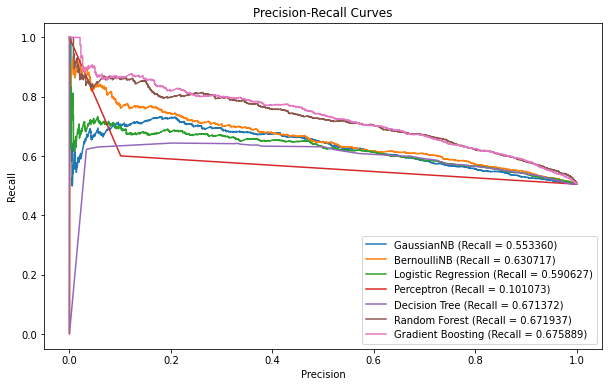

In [ ]:
# Plot Precision-Recall Curve with Recall legend
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score

#Each of the code line below uses the actual 'y' values i.e. labels and using sklearn's `precision-recall` curve we calculate the precision\
#recall that can be used to plot
precision_gnb, recall_gnb, thresholds_gnb = precision_recall_curve(y_val_best, gnb_pred_val_probs, pos_label=1)
rec_gnb = recall_score(y_val_best, gnb_pred_val_labels)
precision_bnb, recall_bnb, thresholds_bnb = precision_recall_curve(y_val_best, bnb_pred_val_probs, pos_label=1)
rec_bnb = recall_score(y_val_best, bnb_pred_val_labels)
precision_logit, recall_logit, thresholds_logit = precision_recall_curve(y_val_best, logit_pred_val_probs, pos_label=1)
rec_logit = recall_score(y_val_best, logit_pred_val_labels)
precision_perc, recall_perc, thresholds_perc = precision_recall_curve(y_val_best, perc_pred_val_labels, pos_label=1)
rec_perc = recall_score(y_val_best, perc_pred_val_labels)
precision_dt, recall_dt, thresholds_dt = precision_recall_curve(y_val_best, dt_pred_val_probs, pos_label=1)
rec_dt = recall_score(y_val_best, dt_pred_val_labels)
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_val_best, rf_pred_val_probs, pos_label=1)
rec_rf = recall_score(y_val_best, rf_pred_val_labels)
precision_gbdt, recall_gbdt, thresholds_gbdt = precision_recall_curve(y_val_best, gbdt_pred_val_probs, pos_label=1)
rec_gbdt = recall_score(y_val_best, gbdt_pred_val_labels)

#following code plots the Precision-Recall Curve
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(recall_gnb, precision_gnb, label='GaussianNB (Recall = {:.6f})'.format(rec_gnb))
plt.plot(recall_bnb, precision_bnb, label='BernoulliNB (Recall = {:.6f})'.format(rec_bnb))
plt.plot(recall_logit, precision_logit, label='Logistic Regression (Recall = {:.6f})'.format(rec_logit))
plt.plot(recall_perc, precision_perc, label='Perceptron (Recall = {:.6f})'.format(rec_perc))
plt.plot(recall_dt, precision_dt, label='Decision Tree (Recall = {:.6f})'.format(rec_dt))
plt.plot(recall_rf, precision_rf, label='Random Forest (Recall = {:.6f})'.format(rec_rf))
plt.plot(recall_gbdt, precision_gbdt, label='Gradient Boosting (Recall = {:.6f})'.format(rec_gbdt))
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curves')
plt.legend()
plt.show()

From the above precision recall curve, we can observe that our **top three models are `Decision Trees`, `Randon Forest` and `Gradient Boosting Machine`**. GBM has the highest recall rate of 0.675 while still preserving a high precision rate. Thus we decide to **choose Gradient Boosting Machine as our final model**. Although Random Forest gives us a similar result we observed that our GBM trains faster for a large number of trees as compared to Random Forest. Since we would like a model that is able to provide us fast real world prediction, we decided to choose Gradient Boosting Machine over Random Forest.

#### Model Interpretation and Feature Importance Using SHAP


Even for experts at times it is difficult to interpret or explain the models directly as to why a record was classified as either 0 or 1. More complex the model, more is the opacity of the model. Moreover, as the decision makers often times are experts in their field but might not be able to understand the machine learning language, we decided to **use SHAP - a library for Python that helps explain the model**. This will help the financial instituations in our case to **better understand which features are responsible for making the decision as well as which features were responsible for making an applicant defaulter or non-defaulter**. More details and the documentation for SHAP can be found <A href= "https://shap.readthedocs.io/en/latest/">here</A> .

In [ ]:
!pip install shap #install shap

In [ ]:
import shap

In [ ]:
exp= shap.TreeExplainer(best_gbdt) #create a tree exaplainer using our final gradient boosting model
shap_values= exp.shap_values(X_val_best) #generate shap values for our validation data 

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


**First we look at the feature importance plot:**

From the summary plot we can see that most important features are:
- days of credit from the credit history (bureau data) - How many days before current application did client apply for Credit Bureau credit
- the amount of goods price- the price of the goods for which the loan is given
- days since birth - age 
- amount of debt acoording to bureau data/ credit history
- amount of payment according to the installment payment data 
- days of employment 
- amount of loan annuity, etc.

One interesting feature is the feature for whether the applicant is female or not. This can be attributed to the fact that most of our applicants are females and since the dataset is imbalanced, **many of our defaulter also turn out to be female**.Thus this is something that should be taken care of. This issue is addressed in our future work section. 

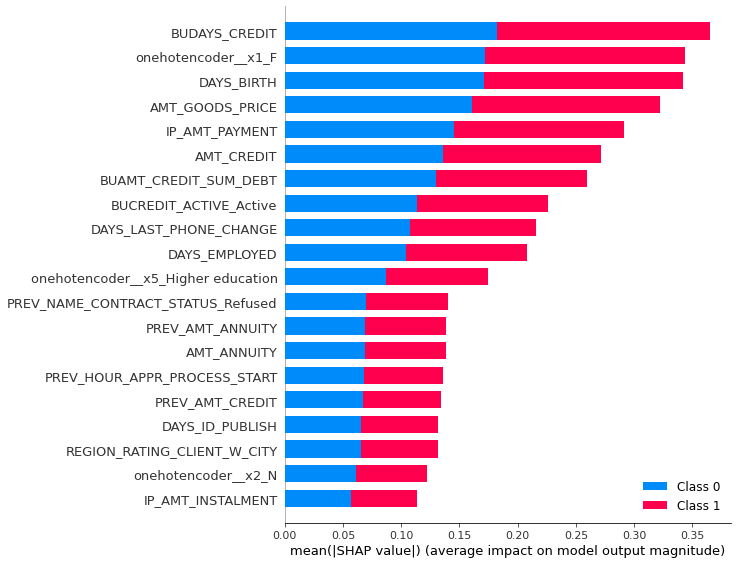

In [ ]:
shap.summary_plot(shap_values, X_val_best)

Now we look at a random sample that was classified as '0' or 'non-defaulter'. The base value is calculated in reference to what we want to predict. Since we chose 1 to be our class of interest, **the lower the shap value more is it's probability to be classified as 0**.  We can see from the following force plot that **features like `AMT_CREDIT` and `DAYS_EMPLOYED` are trying to push the applicant to be classified as 1 i.e default** but the **`AMT_GOODS_PRICE`, `IP_AMT_PAYMENT` and `BUDAYS_CREDIT` decrease the shap value making this particular applicant to be classified as 0**. 

In [ ]:
shap.initjs()
shap.force_plot(exp.expected_value[0], shap_values[1][1,:],X_val_best.iloc[1,:])

Now we look at a random sample that was classified as '1' or 'defaulter'. The base value is calculated in reference to what we want to predict. Since our class of interest is 1, **the higher the shap value more is it's probability to be classified as 1**. We can see from the following force plot that the values of **`IP_AMT_PAYMENT` and `BUDAYS_CREDIT` increase the shap value making this particular applicant to be classified as 1**. 

In [ ]:
shap.initjs()
shap.force_plot(exp.expected_value[0], shap_values[1][8,:],X_val_best.iloc[8,:])

### Final Prediction On Test Data

We now finally use our Gradient Boosting Machine to predict on our test data that was not used in either our training or our model selection process. 

In [ ]:
gbdt_pred_test_probs = best_gbdt.predict_proba(x_test)[:, 1]
gbdt_pred_test_labels = best_gbdt.predict(x_test)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, gbdt_pred_test_labels).ravel()
print('FPR: {:.6f}\t TPR: {:.6f}'.format(fp / (fp + tn), 
                                         tp / (tp + fn)))

FPR: 0.329212	 TPR: 0.649167


**Our final Gradient boosting machine model gives us a recall rate of 0.649 on our test data.**

### LIME - Locally Interpretable Model-Agnostic Explanation

To make it even more simpler and take a look at why a particular applicant in our test data is classified as default or non-default , we recommend using LIME - Locally Interpretable Model-Agnostic Explanations. LIME helps us generate a report with top k features in descending order of their importance and show us which features are responsible for classifying a particular record as default or non-default. This is an alternative for SHAP. The model interpretability is more simplified with LIME and if the decision makers are more interested in looking at every record (case by case) LIME would be a better option. The main attribute of LIME is that it has ability to take a complex model like Gradient Boosting Machine and interpret it through a local model prespective which is highly interpretable. Thus LIME results are model agnostic. More details and Documentation for LIME can be found <a href="https://lime-ml.readthedocs.io/en/latest/"> here </a>.

In [ ]:
!pip install lime #install lime

In [ ]:
import lime #import Lime
import lime.lime_tabular

Intercept 0.43417366206340974
Prediction_local [0.18211341]
Right: 0.1804778027385673


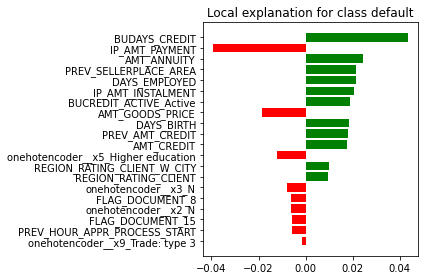

In [ ]:
X_explain = x_test #use feature of test data
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=x.values,
                                                   feature_names=x.columns.values,
                                                   discretize_continuous=False,
                                                   class_names=["non-default", "default"],
                                                   mode="classification",
                                                   verbose=True,
                                                   random_state=0) #develop an explainer 

#Explaining a non default subject in test set using top 20 features
exp = explainer.explain_instance(X_explain.values[2,:],best_gbdt.predict_proba, 
                                 num_features=20) # use our best GBM model and predicted probabilities for this particular record in test data
#Plot local explanation
plt = exp.as_pyplot_figure()
plt.tight_layout()
exp.show_in_notebook(show_table=True)

**From the above LIME results we can observe that this applicant will be classified as 0 because of higher `AMT_GOODS_PRICE` i.e the price of goods on which the loan was provided and `IP_AMT_PAYMENT` i.e. the average value of past interest payment**.

Intercept 0.43093996943227075
Prediction_local [0.53860964]
Right: 0.5960972091818442


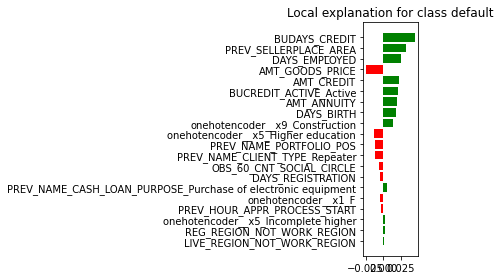

In [ ]:
#Explaining a non default subject in test set using top 20 features
exp = explainer.explain_instance(X_explain.values[9,:],best_gbdt.predict_proba, 
                                 num_features=20) # use our best GBM model and predicted probabilities for this particular record in test data
#Plot local explanation
plt = exp.as_pyplot_figure()
plt.tight_layout()
exp.show_in_notebook(show_table=True)

**From the above LIME results we can observe that this applicant in our test data would be classified as `defaulter` because of `AMT_CREDIT`, `BU_DAYS_CREDIT`, low value of `DAYS_EMPLOYED` etc. Thus LIME makes it very easy to interpret each and every result.**

## Recommendations, Limitations and Future Work

- As we can observe above our final GBM model gives us a recall rate of 0.649 on the test data and we recommend using this model to predict the credit risk for the applicants.
- The recall rate from the model is not very high. So we would recommend that our model should be used more as a flagging system rather than being used to make the final decision. Once an applicant is flagged, the experts can take a look at the shap force plot for the particluar applicant and decide whether the features classifying the applicant as 'defaulter' are important enough according to their expertise to not provide a loan to that particular applicant.
- We highly recommend using LIME/ SHAP to interpret the results from the model and since we propose that our model be used as more of a flagging system, reports generated by LIME will come in very handy for the decision makers. 
- Our recommendation would also be to use more complex models like neural networks to train the model and compare the recall rate with our best performing model (GBM).
- The dataset is currently highly imbalanced and thus building a fair model which also gives us a higher recall rate is not easy. Fairness metrics should be used to achieve fairness across genders present in our dataset. 